In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("/Users/gunnvantsaini/Data/Work/Python Trainings/PythonForModellers/Data/kc_housingdata.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data_model=data[['price','bedrooms','bathrooms','sqft_living']]

In [5]:
data_model.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
dtype: int64

In [6]:
### Scale our data
import sklearn.preprocessing as preprocessing

In [7]:
scaler=preprocessing.StandardScaler()

In [8]:
data_scaled=scaler.fit_transform(data_model)

In [9]:
data_scaled

array([[-0.86671733, -0.39873715, -1.44746357, -0.97983502],
       [-0.00568792, -0.39873715,  0.1756067 ,  0.53363434],
       [-0.98084935, -1.47395936, -1.44746357, -1.42625404],
       ...,
       [-0.37586519, -1.47395936, -1.77207762, -1.15404732],
       [-0.38158814, -0.39873715,  0.50022075, -0.52252773],
       [-0.58588173, -1.47395936, -1.77207762, -1.15404732]])

In [10]:
data_model.head()

,price,bedrooms,bathrooms,sqft_living
0,221900.0,3,1.00,1180
1,538000.0,3,2.25,2570
2,180000.0,2,1.00,770
3,604000.0,4,3.00,1960
4,510000.0,3,2.00,1680


In [11]:
import sklearn.cluster as cluster

In [16]:
mod1=cluster.KMeans(n_clusters=3)

In [17]:
mod1=mod1.fit(data_scaled)

In [18]:
mod1.cluster_centers_

array([[ 1.88826213,  1.08534638,  1.53828912,  1.91997499],
       [-0.03526871,  0.35465742,  0.36895087,  0.22515342],
       [-0.46468042, -0.72681522, -0.86617881, -0.79253015]])

In [19]:
mod1.labels_

array([2, 1, 2, ..., 2, 1, 2], dtype=int32)

In [20]:
data_model['cluster']=mod1.labels_

/Users/gunnvantsaini/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
data_model.head()

,price,bedrooms,bathrooms,sqft_living,cluster
0,221900.0,3,1.00,1180,2
1,538000.0,3,2.25,2570,1
2,180000.0,2,1.00,770,2
3,604000.0,4,3.00,1960,1
4,510000.0,3,2.00,1680,2


In [22]:
data_model['cluster'].unique()

array([2, 1, 0])

In [23]:
### Scree Plot
mod1.inertia_

39577.935047404746

In [24]:
%%time
clusters=[2,3,4,5,6,7,8,9,10]
wss=[]
for i in clusters:
    mod=cluster.KMeans(n_clusters=i)
    mod=mod.fit(data_scaled)
    wss.append(mod.inertia_)

CPU times: user 17.2 s, sys: 434 ms, total: 17.6 s
Wall time: 11.5 s


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline ## embed the plot in the notebook

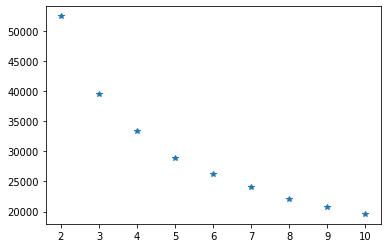

In [26]:
plt.plot(clusters,wss,"*")

In [ ]:
### Closely 6,7,8 cluster model and then make a call
# Cluster Profiling====> Are my clusters meaningfull?